In [1]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# 데이터 불러오기
file_path = '/content/drive/MyDrive/Colab Notebooks/final_nba_data.csv'
data = pd.read_csv(file_path, encoding='latin1')

# 데이터 확인
data_info = data.info()
data_head = data.head()

data_info, data_head

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3149 entries, 0 to 3148
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    3149 non-null   object 
 1   debut   3149 non-null   int64  
 2   start   3149 non-null   int64  
 3   end     3149 non-null   int64  
 4   salary  3149 non-null   float64
 5   birth   3149 non-null   int64  
 6   target  3149 non-null   float64
 7   Pos     2496 non-null   object 
 8   G       2496 non-null   float64
 9   GS      2496 non-null   float64
 10  MP      2496 non-null   float64
 11  FG      2496 non-null   float64
 12  FGA     2496 non-null   float64
 13  FG%     2496 non-null   float64
 14  3P      2496 non-null   float64
 15  3PA     2496 non-null   float64
 16  3P%     2496 non-null   float64
 17  2P      2496 non-null   float64
 18  2PA     2496 non-nu

(None,
            name  debut  start   end     salary  birth   target  Pos       G  \
 0   A.J. Lawson   2021   2023  2026  1978006.0   2000  0.01397  NaN     NaN   
 1  Aaron Brooks   2007   2012  2013  3323125.0   1985  0.05725   PG  50.000   
 2  Aaron Brooks   2007   2012  2013  2454000.0   1985  0.04228   PG  50.000   
 3  Aaron Brooks   2007   2015  2015  2250000.0   1985  0.03214   PG  45.000   
 4  Aaron Brooks   2007   2016  2016  2700000.0   1985  0.02868   PG  50.125   
 
        GS  ...      FT%     ORB    DRB    TRB     AST    STL   BLK     TOV  \
 0     NaN  ...      NaN     NaN    NaN    NaN     NaN    NaN   NaN     NaN   
 1  26.500  ...  0.86375  0.4250  1.225  1.625  4.3000  0.625  0.10  1.9750   
 2  26.500  ...  0.86375  0.4250  1.225  1.625  4.3000  0.625  0.10  1.9750   
 3  10.900  ...  0.76210  0.3800  1.150  1.540  3.0800  0.590  0.17  1.5400   
 4  10.625  ...  0.71925  0.3875  1.225  1.625  2.6875  0.575  0.20  1.4375   
 
       PF      PTS  
 0    NaN     

In [2]:

# 결측치가 있는 모든 행 제거
data_cleaned = data.dropna()

# Pos 열의 값이 특정 값인 행 제거
positions_to_remove = ['C-PF', 'PF-SF', 'PG-SG', 'SF-SG', 'SG-PG', 'SG-SF']
data_filtered = data_cleaned[~data_cleaned['Pos'].isin(positions_to_remove)]

# Pos 열을 원 핫 인코딩
data_encoded = pd.get_dummies(data_filtered, columns=['Pos'])
# 원-핫 인코딩된 열만 선택하여 int로 변환
encoded_columns = [col for col in data_encoded.columns if col.startswith('Pos_')]
data_encoded[encoded_columns] = data_encoded[encoded_columns].astype(int)

# 결과 데이터 확인
data_encoded.head()


,name,debut,start,end,salary,birth,target,G,GS,MP,...,STL,BLK,TOV,PF,PTS,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
1,Aaron Brooks,2007,2012,2013,3323125.0,1985,0.05725,50.000000,26.500000,25.050000,...,0.625000,0.100000,1.975000,2.025,12.875000,0,0,1,0,0
2,Aaron Brooks,2007,2012,2013,2454000.0,1985,0.04228,50.000000,26.500000,25.050000,...,0.625000,0.100000,1.975000,2.025,12.875000,0,0,1,0,0
3,Aaron Brooks,2007,2015,2015,2250000.0,1985,0.03214,45.000000,10.900000,19.990000,...,0.590000,0.170000,1.540000,1.860,8.790000,0,0,1,0,0
4,Aaron Brooks,2007,2016,2016,2700000.0,1985,0.02868,50.125000,10.625000,18.925000,...,0.575000,0.200000,1.437500,1.850,7.887500,0,0,1,0,0
5,Aaron Brooks,2007,2017,2017,2116955.0,1985,0.02136,51.777778,9.444444,18.355556,...,0.555556,0.188889,1.388889,1.800,7.566667,0,0,1,0,0


In [3]:
# target feature (목표 변수)
target = data_encoded['target']

# input feature (입력 변수들)
input_features = data_encoded.drop(columns=['name', 'target', 'salary'])

# 결과 데이터 확인
input_features.head(), target.head()


(   debut  start   end  birth          G         GS         MP        FG  \
 1   2007   2012  2013   1985  50.000000  26.500000  25.050000  4.500000   
 2   2007   2012  2013   1985  50.000000  26.500000  25.050000  4.500000   
 3   2007   2015  2015   1985  45.000000  10.900000  19.990000  3.150000   
 4   2007   2016  2016   1985  50.125000  10.625000  18.925000  2.900000   
 5   2007   2017  2017   1985  51.777778   9.444444  18.355556  2.788889   
 
          FGA       FG%  ...       STL       BLK       TOV     PF        PTS  \
 1  11.375000  0.395750  ...  0.625000  0.100000  1.975000  2.025  12.875000   
 2  11.375000  0.395750  ...  0.625000  0.100000  1.975000  2.025  12.875000   
 3   7.900000  0.399400  ...  0.590000  0.170000  1.540000  1.860   8.790000   
 4   7.062500  0.405500  ...  0.575000  0.200000  1.437500  1.850   7.887500   
 5   6.788889  0.405222  ...  0.555556  0.188889  1.388889  1.800   7.566667   
 
    Pos_C  Pos_PF  Pos_PG  Pos_SF  Pos_SG  
 1      0       

In [4]:
input_features.shape, target.shape

((2469, 34), (2469,))

In [5]:
input_features['debut'] = input_features['debut'].astype(int)
input_features.info(), target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2469 entries, 1 to 3142
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   debut   2469 non-null   int64  
 1   start   2469 non-null   int64  
 2   end     2469 non-null   int64  
 3   birth   2469 non-null   int64  
 4   G       2469 non-null   float64
 5   GS      2469 non-null   float64
 6   MP      2469 non-null   float64
 7   FG      2469 non-null   float64
 8   FGA     2469 non-null   float64
 9   FG%     2469 non-null   float64
 10  3P      2469 non-null   float64
 11  3PA     2469 non-null   float64
 12  3P%     2469 non-null   float64
 13  2P      2469 non-null   float64
 14  2PA     2469 non-null   float64
 15  2P%     2469 non-null   float64
 16  eFG%    2469 non-null   float64
 17  FT      2469 non-null   float64
 18  FTA     2469 non-null   float64
 19  FT%     2469 non-null   float64
 20  ORB     2469 non-null   float64
 21  DRB     2469 non-null   float64
 22  TRB  

(None, None)

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
#표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost Regressor 초기화
xgb = XGBRegressor(objective='reg:squarederror')

# Grid Search 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf, verbose=2, n_jobs=-1)

# Grid Search 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터 출력
print("Best parameters found: ", grid_search.best_params_)
print("Best CV score: ", grid_search.best_score_)

# 최적의 모델로 테스트 데이터 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)


Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best CV score:  0.001268945108203033


In [9]:
from sklearn.metrics import mean_squared_error, r2_score

train_r2 = r2_score(y_train, best_model.predict(X_train_scaled))
train_mse = mean_squared_error(y_train, best_model.predict(X_train_scaled))

test_r2 = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)

print(f"XGBoost Train R²: {train_r2}")
print(f"XGBoost MSE: {train_mse}")
print(f"XGBoost R²: {test_r2}")
print(f"XGBoost MSE: {test_mse}")


XGBoost Train R²: 0.9407704534082864
XGBoost MSE: 0.0003213704574273396
XGBoost R²: 0.6986066634277419
XGBoost MSE: 0.0015871314559896903


In [10]:
!pip install graphviz pydotplus

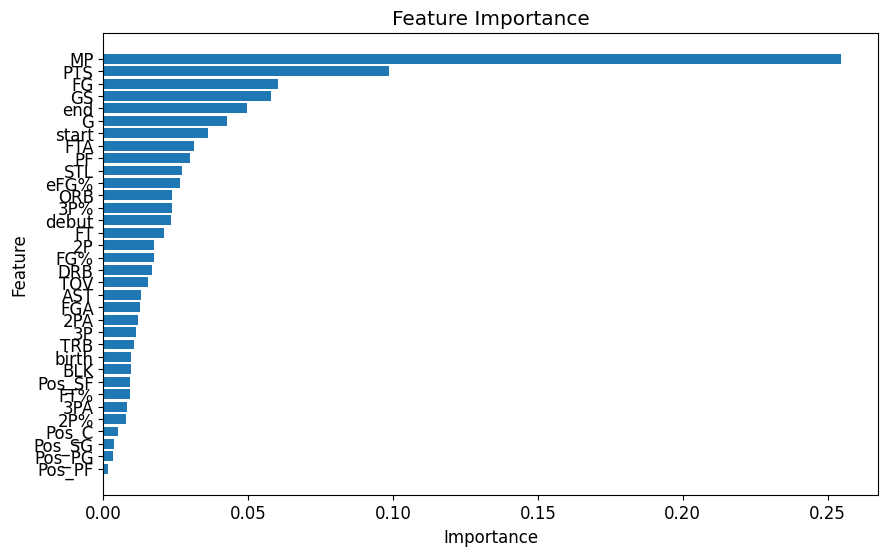

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import display
import graphviz
import xgboost as xgb
from xgboost import plot_importance, plot_tree

feature_names = X_train_scaled.columns if hasattr(X_train_scaled, 'columns') else [f'feature_{i}' for i in range(X_train_scaled.shape[1])]
feature_importances = best_model.feature_importances_
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y axis to have the most important feature on top
plt.show()

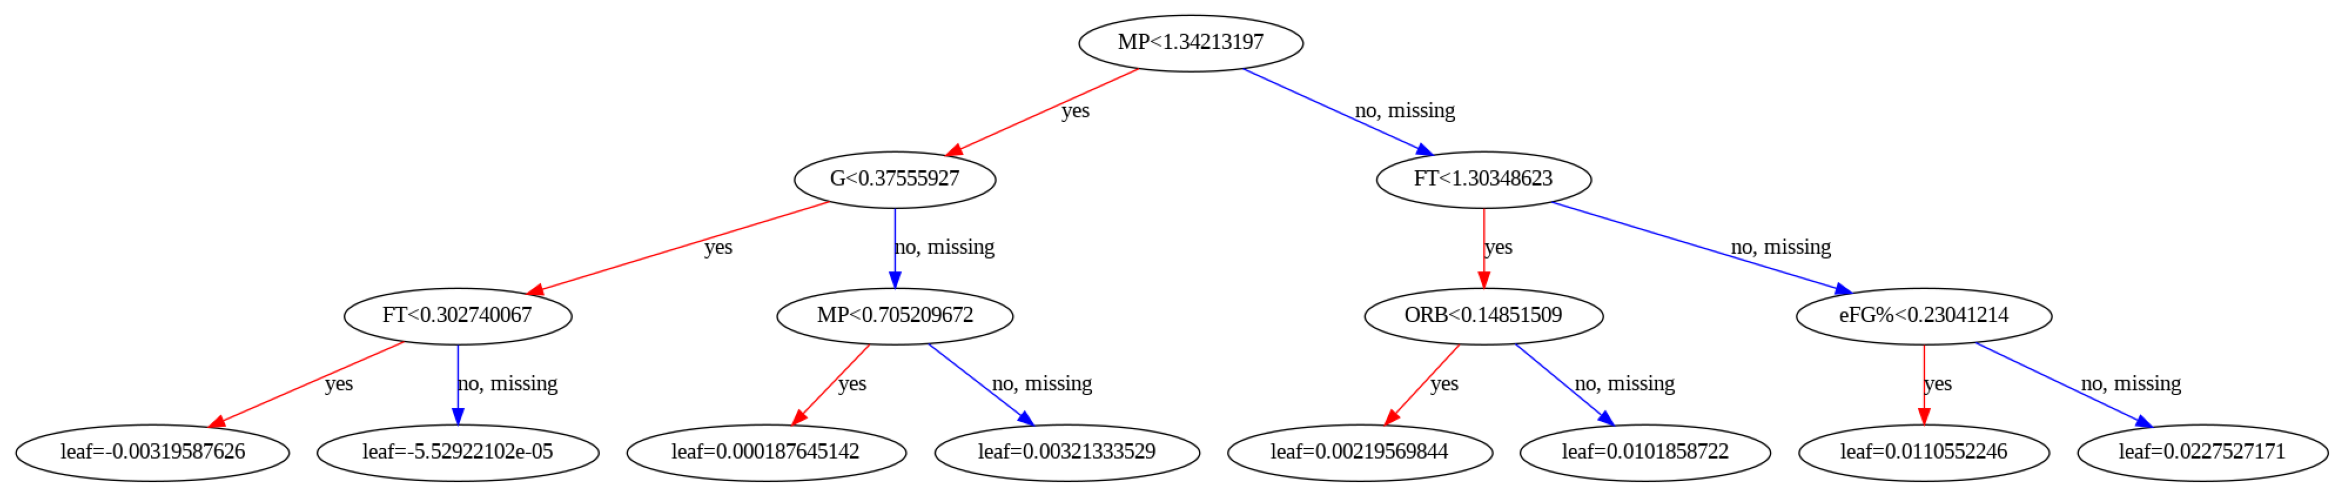

In [30]:
# 피처 이름 추출
feature_names = X_train.columns.tolist()

# 피처 이름을 맵핑하는 파일을 생성
with open('xgb.fmap', 'w') as f:
    for i, feat in enumerate(feature_names):
        f.write(f"{i}\t{feat}\tq\n")

# 최적의 모델로부터 Booster 객체를 가져옴
booster = best_model.get_booster()

# 트리 시각화 (첫 번째 트리만 시각화) - 실제 피처 이름 사용
fig, ax = plt.subplots(figsize=(30, 20))
xgb.plot_tree(booster, num_trees=0, ax=ax, fmap='xgb.fmap')
plt.show()

In [31]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

base_estimator = DecisionTreeRegressor(random_state=42)
adaboost = AdaBoostRegressor(base_estimator=base_estimator, random_state=42)

# Grid Search 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'base_estimator__max_depth': [4, 5, 6]
}

# 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf, verbose=2, n_jobs=-1)

# Grid Search 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터 출력
print("Best parameters found: ", grid_search.best_params_)
print("Best CV score: ", grid_search.best_score_)

# 최적의 모델로 테스트 데이터 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)



Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters found:  {'base_estimator__max_depth': 6, 'learning_rate': 0.3, 'n_estimators': 100}
Best CV score:  -0.0018285549414616125


In [32]:
train_r2 = r2_score(y_train, best_model.predict(X_train_scaled))
train_mse = mean_squared_error(y_train, best_model.predict(X_train_scaled))

test_r2 = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)

print(f"ADABoost Train R²: {train_r2}")
print(f"ADABoost MSE: {train_mse}")
print(f"ADABoost R²: {test_r2}")
print(f"ADABoost MSE: {test_mse}")


ADABoost Train R²: 0.8642546046326798
ADABoost MSE: 0.0007365337456247546
ADABoost R²: 0.5530431909978667
ADABoost MSE: 0.0023536658743150093


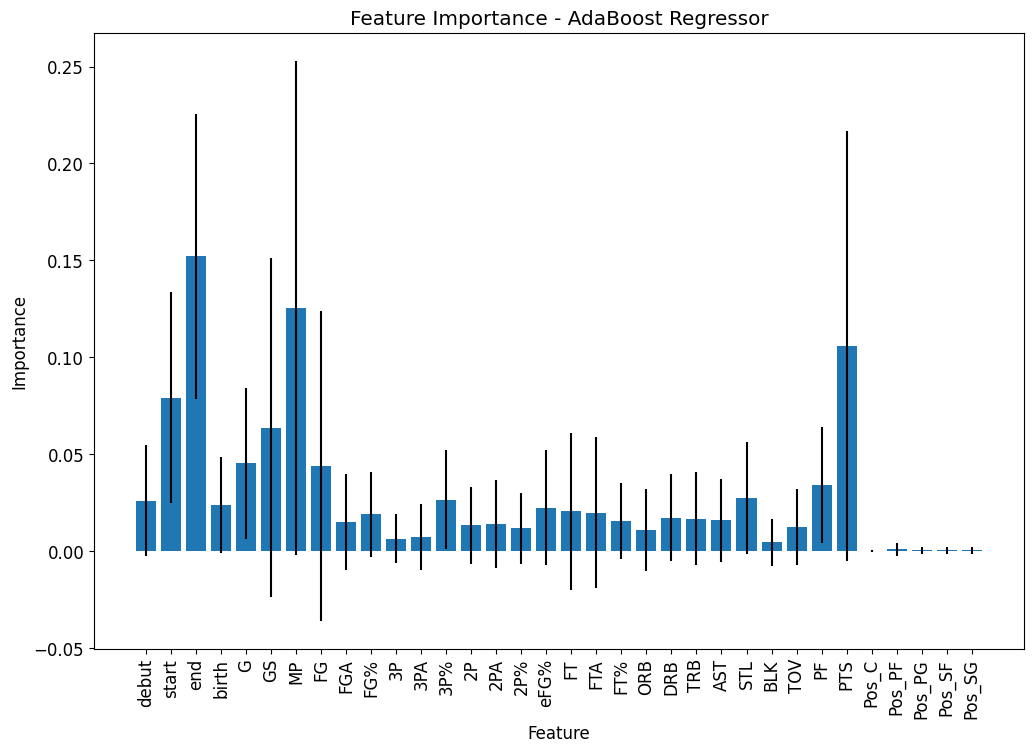

In [54]:
importances = best_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)

# 피처 이름 추출
feature_names = X_train.columns.tolist()

# Feature importance 시각화
plt.figure(figsize=(12, 8))
plt.bar(range(len(importances)), importances, yerr=std, align='center')
plt.xticks(range(len(importances)), feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - AdaBoost Regressor')
plt.show()

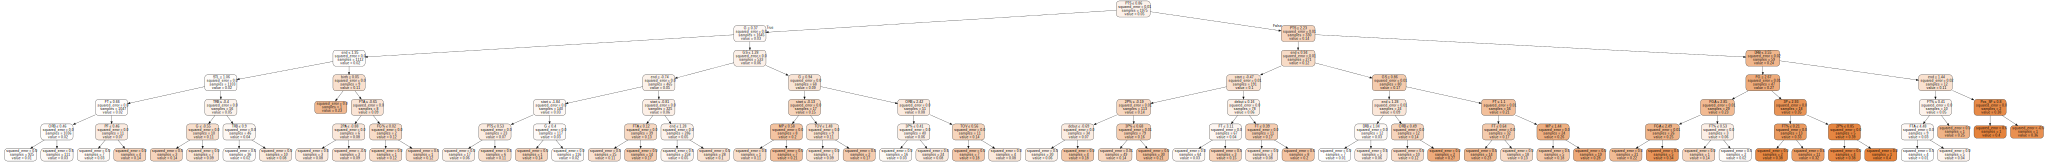

In [59]:
import graphviz
from sklearn.tree import export_graphviz

# 최적의 모델에서 첫 번째 DecisionTreeRegressor 추출
first_tree = best_model.estimators_[0]

# 트리를 DOT 파일로 내보내기 (글씨 크기와 노드 크기 조정 포함)
dot_data = export_graphviz(
    first_tree,
    out_file=None,
    feature_names=X_train.columns,  # feature_names를 실제 feature 이름으로 대체
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=False,
    precision=2,
)

# DOT 파일을 그래프로 변환
graph = graphviz.Source(dot_data)

# 그래프를 화면에 표시
graph.view()
graph